<a href="https://colab.research.google.com/github/hisyamilys/ROP-Prediction/blob/main/ROP_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Dataset

In [7]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
#menampilkan data sumur UP-5
dataUP5 = pd.read_csv('https://raw.githubusercontent.com/hisyamilys/ROP-Prediction/main/UP-5.csv')
dataUP5

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Mikasa Anhydrite,2481,2480.79,11.5,17,737.4,3289,137,6867,11.0,11.080,60,50.07,23/06/2010 00.50.17
2054,Mikasa Anhydrite,2482,2481.80,25.6,13,737.1,3291,136,7945,11.0,11.080,60,50.14,23/06/2010 00.54.48
2055,Mikasa Anhydrite,2483,2482.80,36.7,7,735.2,3298,127,5831,11.0,11.080,59,50.19,23/06/2010 01.28.56
2056,Mikasa Anhydrite,2484,2483.79,22.5,11,733.7,3290,135,7808,11.0,11.080,59,50.28,23/06/2010 01.34.33


In [9]:
#menampilkan data sumur UP-6
dataUP6 = pd.read_csv('https://raw.githubusercontent.com/hisyamilys/ROP-Prediction/main/UP-6.csv')
dataUP6

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.00,18,18.02,25.6,2,152.4,10,62,1363,8.700,8.700,0,0.04,28/07/2010 12.17.20
1,Mio,24.00,19,19.00,35.5,2,152.2,10,57,649,8.700,8.700,0,0.11,28/07/2010 12.21.35
2,Mio,24.00,20,19.50,20.6,2,114.3,8,43,0,8.700,8.700,0,0.17,28/07/2010 12.46.54
3,Mio,24.00,21,19.50,20.1,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
4,Mio,24.00,22,19.50,19.9,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Mikasa Ahydrite,12.25,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05,08/08/2010 06.47.37
2509,Mikasa Ahydrite,12.25,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08,08/08/2010 06.49.41
2510,Mikasa Ahydrite,12.25,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13,08/08/2010 06.52.14
2511,Mikasa Ahydrite,12.25,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15,08/08/2010 06.53.22


In [10]:
#memperbaiki nama kolom atau feature
dataUP6.rename(columns={'FORMATION':'Formation','TQ (lb*ft)':'TQ (lb.ft)'}, inplace=True)
dataUP6

,Formation,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.00,18,18.02,25.6,2,152.4,10,62,1363,8.700,8.700,0,0.04,28/07/2010 12.17.20
1,Mio,24.00,19,19.00,35.5,2,152.2,10,57,649,8.700,8.700,0,0.11,28/07/2010 12.21.35
2,Mio,24.00,20,19.50,20.6,2,114.3,8,43,0,8.700,8.700,0,0.17,28/07/2010 12.46.54
3,Mio,24.00,21,19.50,20.1,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
4,Mio,24.00,22,19.50,19.9,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Mikasa Ahydrite,12.25,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05,08/08/2010 06.47.37
2509,Mikasa Ahydrite,12.25,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08,08/08/2010 06.49.41
2510,Mikasa Ahydrite,12.25,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13,08/08/2010 06.52.14
2511,Mikasa Ahydrite,12.25,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15,08/08/2010 06.53.22


In [11]:
#menggabungkan data sumur UP-5 dan data sumur UP-6
data = dataUP5.append(dataUP6)
data

<ipython-input-11-717db6650ec8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataUP5.append(dataUP6)


,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME,BIT SIZE (in)
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.400,10.401,44,0.01,19/06/2010 07.12.15,NaN
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.400,10.403,40,0.05,19/06/2010 07.14.23,NaN
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.400,10.405,40,0.09,19/06/2010 07.16.43,NaN
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.400,10.407,48,0.20,19/06/2010 09.04.13,NaN
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.400,10.409,58,0.23,19/06/2010 09.05.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Mikasa Ahydrite,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05,08/08/2010 06.47.37,12.25
2509,Mikasa Ahydrite,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08,08/08/2010 06.49.41,12.25
2510,Mikasa Ahydrite,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13,08/08/2010 06.52.14,12.25
2511,Mikasa Ahydrite,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15,08/08/2010 06.53.22,12.25


### Exploratory Data

In [12]:
#menampilkan jumlah baris dan kolom dari data
data.shape

(4571, 15)

In [13]:
#menampilkan feature dari data
data.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME',
       'BIT SIZE (in)'],
      dtype='object')

In [14]:
#menampilkan ringaksan statistik dari data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TMD (m),4571.0,1356.166922,675.703667,18.000,794.0000,1365.000,1936.500,2530.000
TVD (m),4571.0,1356.082098,675.669010,18.020,793.9600,1364.930,1936.390,2529.770
ROP (m/hr),4571.0,78.887880,38.989112,2.700,50.3000,72.400,103.700,309.100
WOB (ton),4571.0,9.234960,3.570045,0.000,7.0000,9.000,12.000,22.000
FR (gpm),4571.0,791.305097,107.319040,114.300,779.1000,816.300,833.850,1410.900
SPP (psi),4571.0,2985.266900,1014.387579,8.000,2418.0000,3118.000,3832.000,4416.000
RPM (rpm),4571.0,147.826734,30.571217,21.000,141.0000,153.000,165.000,199.000
TQ (lb.ft),4571.0,8402.284620,3268.872457,0.000,6201.5000,8595.000,10557.500,19822.000
MW IN (ppg),4571.0,10.682813,0.634545,8.420,10.5575,10.966,11.000,11.208
MW OUT (ppg),4571.0,10.704565,0.622265,7.706,10.5550,10.900,11.080,11.261


In [15]:
#menampilkan jumlah data yang duplikat
data.duplicated().sum()

0

In [16]:
#menampilkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4571 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      4571 non-null   object 
 1   TMD (m)        4571 non-null   int64  
 2   TVD (m)        4571 non-null   float64
 3   ROP (m/hr)     4571 non-null   float64
 4   WOB (ton)      4571 non-null   int64  
 5   FR (gpm)       4571 non-null   float64
 6   SPP (psi)      4571 non-null   int64  
 7   RPM (rpm)      4571 non-null   int64  
 8   TQ (lb.ft)     4571 non-null   int64  
 9   MW IN (ppg)    4571 non-null   float64
 10  MW OUT (ppg)   4571 non-null   float64
 11  RETURN (%)     4571 non-null   int64  
 12  BIT TIME (hr)  4571 non-null   float64
 13  DATE TIME      4571 non-null   object 
 14  BIT SIZE (in)  2513 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 571.4+ KB


In [17]:
#menampilkan jumlah data yang hilang
data.isnull().sum()

Formation           0
TMD (m)             0
TVD (m)             0
ROP (m/hr)          0
WOB (ton)           0
FR (gpm)            0
SPP (psi)           0
RPM (rpm)           0
TQ (lb.ft)          0
MW IN (ppg)         0
MW OUT (ppg)        0
RETURN (%)          0
BIT TIME (hr)       0
DATE TIME           0
BIT SIZE (in)    2058
dtype: int64

In [18]:
#menampilkan tipe dari data
type(data)

pandas.core.frame.DataFrame

#### Univariate Data Analysis

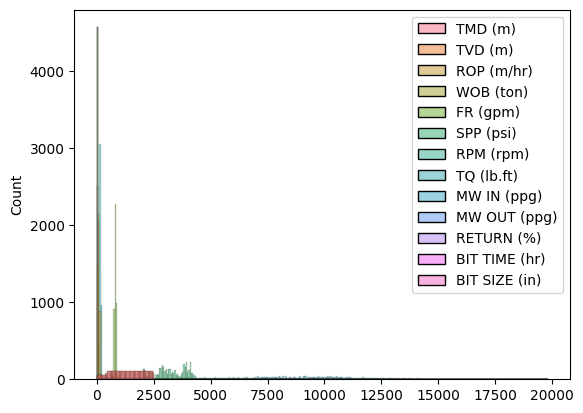

In [19]:
#menampilkan histogram dari data
sb.histplot(data)
plt.show()

<Axes: xlabel='BIT SIZE (in)', ylabel='Count'>

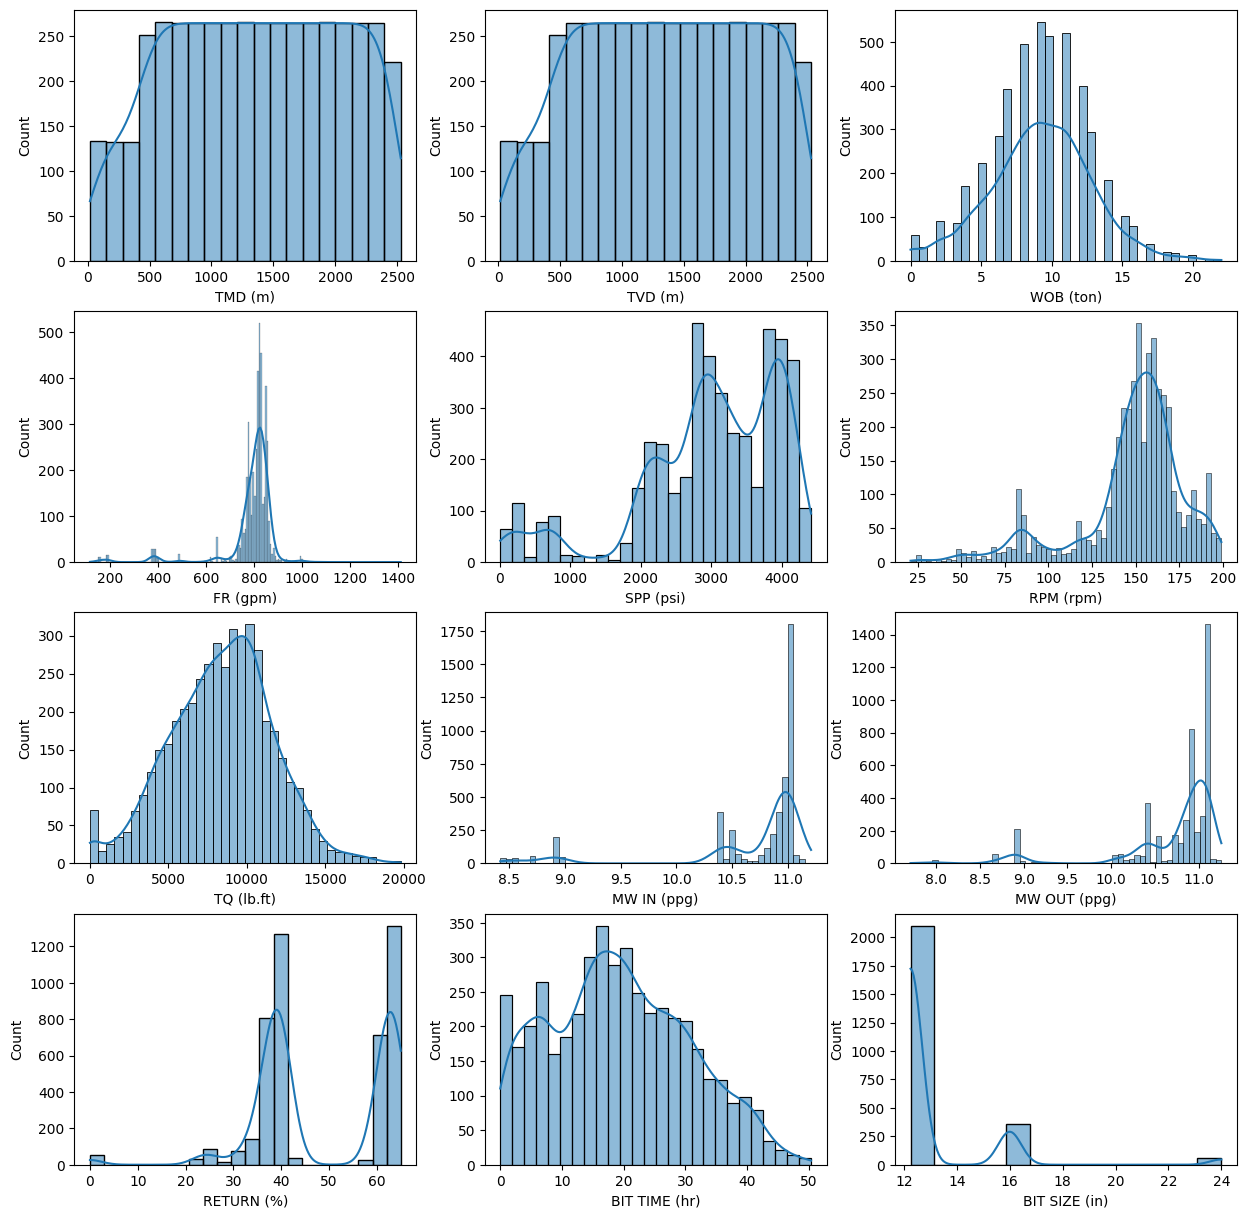

In [20]:
#menampilkan histogram dari tiap feature data
fig, axs = plt.subplots(4, 3,figsize=(15,15))
sb.histplot(data, x='TMD (m)', kde=True, ax=axs[0, 0])
sb.histplot(data, x='TVD (m)', kde=True, ax=axs[0, 1])
sb.histplot(data, x='WOB (ton)', kde=True, ax=axs[0, 2])
sb.histplot(data, x='FR (gpm)', kde=True, ax=axs[1, 0])
sb.histplot(data, x='SPP (psi)', kde=True, ax=axs[1, 1])
sb.histplot(data, x='RPM (rpm)', kde=True, ax=axs[1, 2])
sb.histplot(data, x='TQ (lb.ft)', kde=True, ax=axs[2, 0])
sb.histplot(data, x='MW IN (ppg)', kde=True, ax=axs[2, 1])
sb.histplot(data, x='MW OUT (ppg)', kde=True, ax=axs[2, 2])
sb.histplot(data, x='RETURN (%)', kde=True, ax=axs[3, 0])
sb.histplot(data, x='BIT TIME (hr)', kde=True, ax=axs[3, 1])
sb.histplot(dataUP6, x='BIT SIZE (in)', kde=True, ax=axs[3, 2]) #feature BIT SIZE (in) hanya ada pada data UP-6

<Axes: >

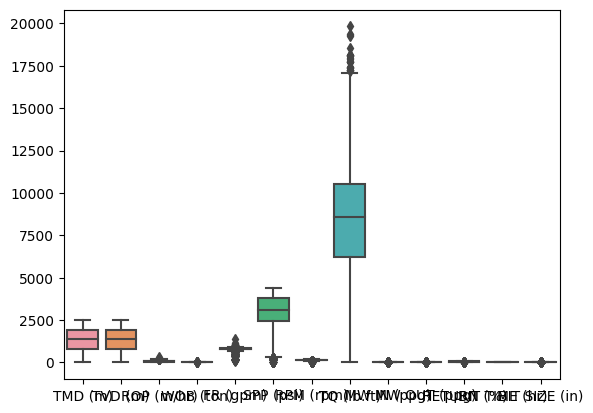

In [21]:
#menampilkan boxplot dari data
sb.boxplot(data)

#### Multivariate Data Analysis

In [22]:
#menampilkan korelasi pada tiap feature data
data.corr(method="pearson")

<ipython-input-22-87595a32b12a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method="pearson")


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),BIT SIZE (in)
TMD (m),1.000000,1.000000,0.043075,0.331032,0.291168,0.865020,0.719332,0.403005,0.669482,0.689328,0.242284,0.954827,-0.564561
TVD (m),1.000000,1.000000,0.043116,0.331055,0.291266,0.865048,0.719365,0.403034,0.669521,0.689370,0.242331,0.954822,-0.564697
ROP (m/hr),0.043075,0.043116,1.000000,-0.215678,0.274835,0.303041,0.249258,0.048978,0.312341,0.299934,-0.015155,-0.061860,-0.395906
WOB (ton),0.331032,0.331055,-0.215678,1.000000,0.182986,0.328813,0.258563,0.506596,0.133990,0.241609,-0.025765,0.333681,-0.345071
FR (gpm),0.291168,0.291266,0.274835,0.182986,1.000000,0.566003,0.536405,0.418237,0.640086,0.633977,0.586463,0.200618,-0.806407
SPP (psi),0.865020,0.865048,0.303041,0.328813,0.566003,1.000000,0.770289,0.473088,0.843318,0.832043,0.203179,0.728330,-0.765866
RPM (rpm),0.719332,0.719365,0.249258,0.258563,0.536405,0.770289,1.000000,0.401169,0.740842,0.731264,0.431969,0.665851,-0.725579
TQ (lb.ft),0.403005,0.403034,0.048978,0.506596,0.418237,0.473088,0.401169,1.000000,0.457954,0.472509,0.346637,0.320994,-0.587793
MW IN (ppg),0.669482,0.669521,0.312341,0.133990,0.640086,0.843318,0.740842,0.457954,1.000000,0.905139,0.462538,0.511817,-0.839315
MW OUT (ppg),0.689328,0.689370,0.299934,0.241609,0.633977,0.832043,0.731264,0.472509,0.905139,1.000000,0.460522,0.571738,-0.780813


<ipython-input-23-4c2883f805a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(method="pearson"), annot=True)


<Axes: >

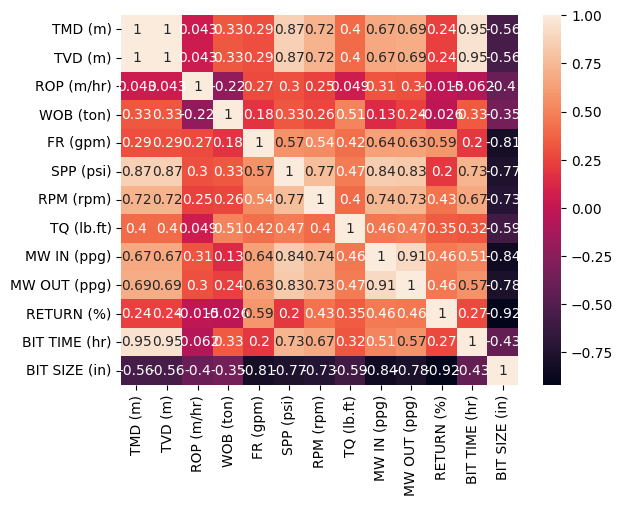

In [23]:
#menampilkan korelasi pada tiap feature data dengan metode heatmap
sb.heatmap(data.corr(method="pearson"), annot=True)

#### Addressing Multi-collinearity Problem

Dengan melihat heatmap di atas, dapat diasumsikan beberapa hal sebagai berikut.
- DATE TIME tidak memiliki korelasi terhadap semua feature.
- BIT SIZE (in) memiliki korelasi yang sangat rendah terhadap semua feature dibandingkan dengan feature lainnya.

Oleh karena itu, feature DATE TIME dan BIT SIZE (in) tidak akan digunakan pada model ROP Prediciton.

In [24]:
#melakukan feature drop dari data
data.drop(labels=['BIT SIZE (in)','DATE TIME'], axis=1, inplace=True)
data

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.400,10.401,44,0.01
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.400,10.403,40,0.05
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.400,10.405,40,0.09
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.400,10.407,48,0.20
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.400,10.409,58,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Mikasa Ahydrite,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05
2509,Mikasa Ahydrite,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08
2510,Mikasa Ahydrite,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13
2511,Mikasa Ahydrite,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15


In [25]:
#menampilkan korelasi pada tiap feature data
data.corr(method="pearson")

<ipython-input-25-87595a32b12a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method="pearson")


,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
TMD (m),1.000000,1.000000,0.043075,0.331032,0.291168,0.865020,0.719332,0.403005,0.669482,0.689328,0.242284,0.954827
TVD (m),1.000000,1.000000,0.043116,0.331055,0.291266,0.865048,0.719365,0.403034,0.669521,0.689370,0.242331,0.954822
ROP (m/hr),0.043075,0.043116,1.000000,-0.215678,0.274835,0.303041,0.249258,0.048978,0.312341,0.299934,-0.015155,-0.061860
WOB (ton),0.331032,0.331055,-0.215678,1.000000,0.182986,0.328813,0.258563,0.506596,0.133990,0.241609,-0.025765,0.333681
FR (gpm),0.291168,0.291266,0.274835,0.182986,1.000000,0.566003,0.536405,0.418237,0.640086,0.633977,0.586463,0.200618
SPP (psi),0.865020,0.865048,0.303041,0.328813,0.566003,1.000000,0.770289,0.473088,0.843318,0.832043,0.203179,0.728330
RPM (rpm),0.719332,0.719365,0.249258,0.258563,0.536405,0.770289,1.000000,0.401169,0.740842,0.731264,0.431969,0.665851
TQ (lb.ft),0.403005,0.403034,0.048978,0.506596,0.418237,0.473088,0.401169,1.000000,0.457954,0.472509,0.346637,0.320994
MW IN (ppg),0.669482,0.669521,0.312341,0.133990,0.640086,0.843318,0.740842,0.457954,1.000000,0.905139,0.462538,0.511817
MW OUT (ppg),0.689328,0.689370,0.299934,0.241609,0.633977,0.832043,0.731264,0.472509,0.905139,1.000000,0.460522,0.571738


<ipython-input-26-4c2883f805a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(method="pearson"), annot=True)


<Axes: >

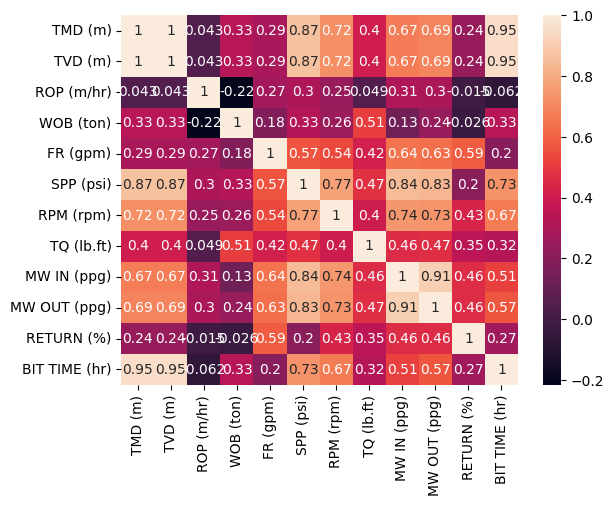

In [26]:
#menampilkan korelasi pada tiap feature data dengan metode heatmap
sb.heatmap(data.corr(method="pearson"), annot=True)

### Data Preprocessing

#### Split Numerica and Categoric

In [27]:
#menampilkan tipe numerik dari data
numerical = data._get_numeric_data()
numerical = numerical.loc[:,~numerical.columns.duplicated()].reset_index(drop=True)
numerical

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
0,428,428.01,33.3,3,514.3,818,70,1915,10.400,10.401,44,0.01
1,429,429.01,39.3,4,428.8,554,79,2383,10.400,10.403,40,0.05
2,430,430.00,26.7,3,442.7,547,79,2499,10.400,10.405,40,0.09
3,431,430.99,29.1,5,604.9,1259,82,1080,10.400,10.407,48,0.20
4,432,432.00,40.8,10,782.1,1846,92,3106,10.400,10.409,58,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
4566,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05
4567,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08
4568,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13
4569,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15


In [28]:
#menampilkan tipe kategorik dari data
categorical = data.drop(numerical, axis=1)
categorical

,Formation
0,Seno
1,Seno
2,Seno
3,Seno
4,Seno
...,...
2508,Mikasa Ahydrite
2509,Mikasa Ahydrite
2510,Mikasa Ahydrite
2511,Mikasa Ahydrite


#### Encoding

In [29]:
#menampilkan jenis-jenis formasi dai data
set(categorical.Formation)

{'Albi',
 'Apti',
 'Barre',
 'Ceno',
 'Eren Shale',
 'Malcolm',
 'Mikasa Ahydrite',
 'Mikasa Anhydrite',
 'Mio',
 'Neo',
 'Seno',
 'Seno anhydratic ',
 'Seno carbonate',
 'Seno salt',
 'Turo'}

In [30]:
#melakukan one-hot encoding pada data tipe kategorik
from sklearn import preprocessing
oh_encoder = preprocessing.OneHotEncoder()
encoded_data = pd.DataFrame(oh_encoder.fit_transform(categorical).toarray())
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
#memberikan label nama pada  data tipe kategorik setelah one-hot encoding
encoded_data.columns = ['Albi','Apti','Barre','Ceno','Eren Shale','Malcolm','Mikasa Ahydrite','Mikasa Anhydrite','Mio','Neo','Seno','Seno anhydratic ','Seno carbonate','Seno salt','Turo']
encoded_data.head()
encoded_data = encoded_data.loc[:,~encoded_data.columns.duplicated()].reset_index(drop=True)
encoded_data

,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Ahydrite,Mikasa Anhydrite,Mio,Neo,Seno,Seno anhydratic,Seno carbonate,Seno salt,Turo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4569,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#menggabungkan data tipe numerik dengan data tipe kategorik setelah one-hot encoding
raw_data = pd.concat([numerical, encoded_data], axis=1)
raw_data

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),...,Malcolm,Mikasa Ahydrite,Mikasa Anhydrite,Mio,Neo,Seno,Seno anhydratic,Seno carbonate,Seno salt,Turo
0,428,428.01,33.3,3,514.3,818,70,1915,10.400,10.401,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,429,429.01,39.3,4,428.8,554,79,2383,10.400,10.403,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,430,430.00,26.7,3,442.7,547,79,2499,10.400,10.405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,431,430.99,29.1,5,604.9,1259,82,1080,10.400,10.407,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,432,432.00,40.8,10,782.1,1846,92,3106,10.400,10.409,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4567,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4568,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4569,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the dataset into the Training set and Test set

In [33]:
#memisahkan data train dan data test
from sklearn.model_selection import train_test_split
X = raw_data.drop(['ROP (m/hr)'], axis=1)
y = raw_data['ROP (m/hr)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Scaling

In [34]:
#standarisasi dengan metode scaling terhadap data train dan data test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Training the Model on the Training Set

Random Forest

In [35]:
#training model random forest
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train_scaled, y_train)

RandomForestRegressor()

Decision Tree

In [36]:
#training model decision tree
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

Linear Regression

In [37]:
#training model linear regression
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)

LinearRegression()

### Model Evaluation

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Random Forest

In [39]:
#evaluasi model training dari random forest
y_predict_train1 = model1.predict(X_train_scaled)
r2_score_train1 = r2_score(y_train, y_predict_train1)
cv_r2_score_train1 = np.mean(cross_val_score(estimator=model1, X=X_train_scaled, y=y_train, cv=5))
mae_train1 = mean_absolute_error(y_train, y_predict_train1)
mse_train1 = mean_squared_error(y_train, y_predict_train1, squared=False)
print(f'MSE Train RandomForest: {mse_train1}')
print(f'MAE Train RandomForest: {mae_train1}')
print(f'R^2 score Train RandomForest: {r2_score_train1}')
print(f'Cross Validation R^2 score Train RandomForest: {cv_r2_score_train1}')

MSE Train RandomForest: 5.7958134524406795
MAE Train RandomForest: 4.02875547045952
R^2 score Train RandomForest: 0.9777190364103386
Cross Validation R^2 score Train RandomForest: 0.8273116927854502


In [40]:
#evaluasi model testing dari random forest
y_predict_test1 = model1.predict(X_test_scaled)
r2_score_test1 = r2_score(y_test, y_predict_test1)
mae_test1 = mean_absolute_error(y_test, y_predict_test1)
mse_test1 = mean_squared_error(y_test, y_predict_test1, squared=False)
print(f'MSE Test RandomForest: {mse_test1}')
print(f'MAE Test RandomForest: {mae_test1}')
print(f'R^2 score Test RandomForest: {r2_score_test1}')

MSE Test RandomForest: 15.557725058246083
MAE Test RandomForest: 10.712102732240433
R^2 score Test RandomForest: 0.8455061914516455


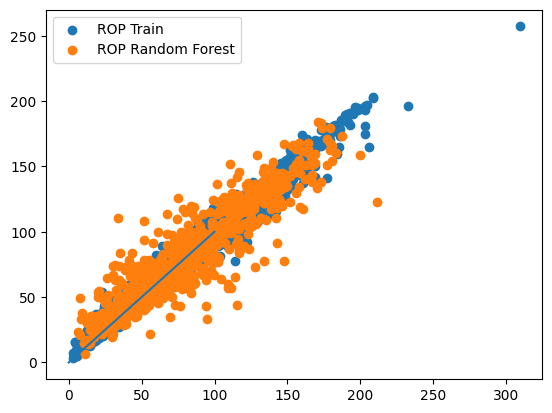

In [41]:
#menampilkan plot hasil train dan test random forest
plt.scatter(y_train, y_predict_train1, label='ROP Train')
plt.scatter(y_test, y_predict_test1, label='ROP Random Forest')
plt.plot([0,100], [0,100])
plt.legend()

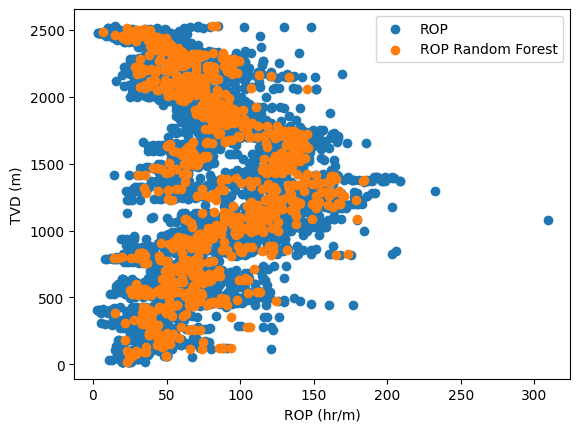

In [42]:
#menampilkan plot train-test random forest vs depth
plt.scatter(y_train, X_train['TVD (m)'], label='ROP')
plt.scatter(y_predict_test1, X_test['TVD (m)'], label='ROP Random Forest')
plt.xlabel('ROP (hr/m)')
plt.ylabel('TVD (m)')
plt.legend()

Decision Tree

In [43]:
#evaluasi model training dari decision tree
y_predict_train2 = model2.predict(X_train_scaled)
r2_score_train2 = r2_score(y_train, y_predict_train2)
cv_r2_score_train2 = np.mean(cross_val_score(estimator=model2, X=X_train_scaled, y=y_train, cv=5))
mae_train2 = mean_absolute_error(y_train, y_predict_train2)
mse_train2 = mean_squared_error(y_train, y_predict_train2, squared=False)
print(f'MSE Train DecisionTree: {mse_train2}')
print(f'MAE Train DecisionTree: {mae_train2}')
print(f'R^2 score Train DecisionTree: {r2_score_train2}')
print(f'Cross Validation R^2 score Train DecisionTree: {cv_r2_score_train2}')

MSE Train DecisionTree: 0.0
MAE Train DecisionTree: 0.0
R^2 score Train DecisionTree: 1.0
Cross Validation R^2 score Train DecisionTree: 0.630711355090655


In [44]:
#evaluasi model testing dari decision tree
y_predict_test2 = model2.predict(X_test_scaled)
r2_score_test2 = r2_score(y_test, y_predict_test2)
mae_test2 = mean_absolute_error(y_test, y_predict_test2)
mse_test2 = mean_squared_error(y_test, y_predict_test2, squared=False)
print(f'MSE Test DecisionTree: {mse_test2}')
print(f'MAE Test DecisionTree: {mae_test2}')
print(f'R^2 Test score DecisionTree: {r2_score_test2}')

MSE Test DecisionTree: 21.689482480530145
MAE Test DecisionTree: 14.379781420765028
R^2 Test score DecisionTree: 0.6997263145147812


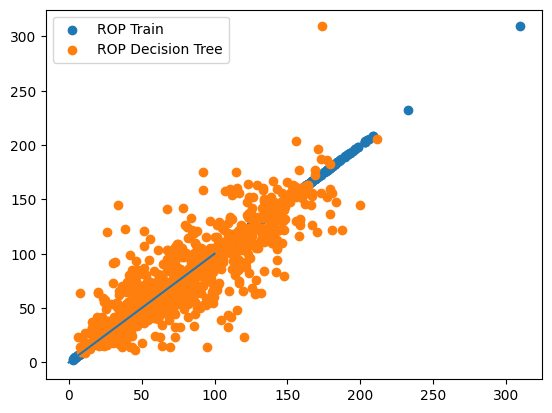

In [45]:
#menampilkan plot hasil train dan test decision tree
plt.scatter(y_train, y_predict_train2, label='ROP Train')
plt.scatter(y_test, y_predict_test2, label='ROP Decision Tree')
plt.plot([0,100], [0,100])
plt.legend()

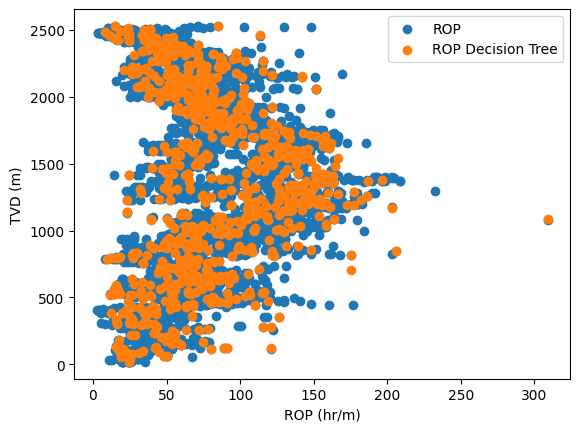

In [46]:
#menampilkan plot train-test decision tree vs depth
plt.scatter(y_train, X_train['TVD (m)'], label='ROP')
plt.scatter(y_predict_test2, X_test['TVD (m)'], label='ROP Decision Tree')
plt.xlabel('ROP (hr/m)')
plt.ylabel('TVD (m)')
plt.legend()

Linear Regression

In [47]:
#evaluasi model training dari linear regression
y_predict_train3 = model3.predict(X_train_scaled)
r2_score_train3 = r2_score(y_train, y_predict_train3)
cv_r2_score_train3 = np.mean(cross_val_score(estimator=model3, X=X_train_scaled, y=y_train, cv=5))
mae_train3 = mean_absolute_error(y_train, y_predict_train3)
mse_train3 = mean_squared_error(y_train, y_predict_train3, squared=False)
print(f'MSE Train LinearRegression: {mse_train3}')
print(f'MAE Train LinearRegression: {mae_train3}')
print(f'R^2 score Train LinearRegression: {r2_score_train3}')
print(f'Cross Validation R^2 score Train LinearRegression: {cv_r2_score_train3}')

MSE Train LinearRegression: 25.529953481683226
MAE Train LinearRegression: 19.481903019229005
R^2 score Train LinearRegression: 0.5676801080834237
Cross Validation R^2 score Train LinearRegression: 0.5560810615320119


In [48]:
#evaluasi model testing dari linear regression
y_predict_test3 = model3.predict(X_test_scaled)
r2_score_test3 = r2_score(y_test, y_predict_test3)
mae_test3 = mean_absolute_error(y_test, y_predict_test3)
mse_test3 = mean_squared_error(y_test, y_predict_test3, squared=False)
print(f'MSE Test LinearRegression: {mse_test3}')
print(f'MAE Test LinearRegression: {mae_test3}')
print(f'R^2 score Test LinearRegression: {r2_score_test3}')

MSE Test LinearRegression: 25.984862322164485
MAE Test LinearRegression: 19.46695545343497
R^2 score Test LinearRegression: 0.5690174015624511


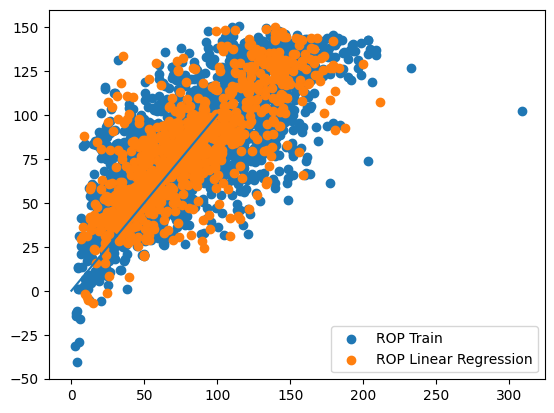

In [49]:
#menampilkan plot hasil train dan test linear regression
plt.scatter(y_train, y_predict_train3, label='ROP Train')
plt.scatter(y_test, y_predict_test3, label='ROP Linear Regression')
plt.plot([0,100], [0,100])
plt.legend()

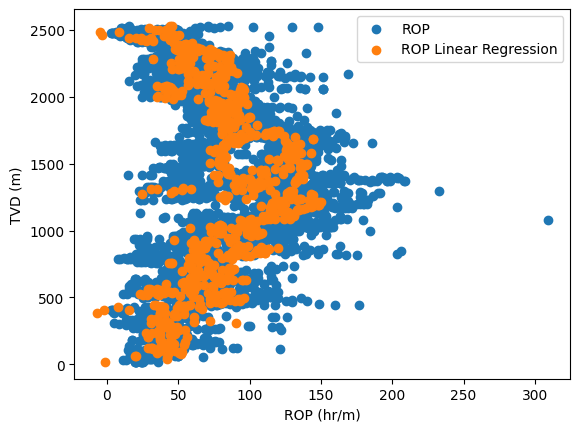

In [50]:
#menampilkan plot train-test linear regression vs depth
plt.scatter(y_train, X_train['TVD (m)'], label='ROP')
plt.scatter(y_predict_test3, X_test['TVD (m)'], label='ROP Linear Regression')
plt.xlabel('ROP (hr/m)')
plt.ylabel('TVD (m)')
plt.legend()

### Feature Importance

In [51]:
#menentukan feature importance dari model random forest
FeatureImportance = pd.DataFrame(model1.feature_importances_,index=X_train.columns,
                                 columns=['Importance']).sort_values('Importance',ascending=False)
FeatureImportance

,Importance
BIT TIME (hr),0.208683
SPP (psi),0.096029
RPM (rpm),0.083386
TQ (lb.ft),0.082537
TVD (m),0.076933
TMD (m),0.073525
Barre,0.070840
Albi,0.064871
WOB (ton),0.063849
RETURN (%),0.054915


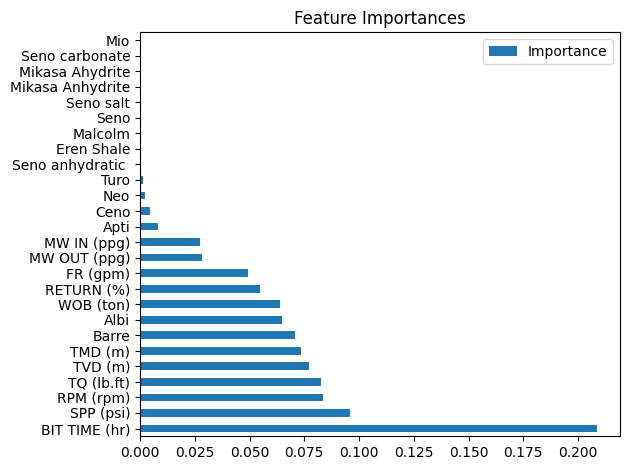

In [52]:
#menampilkan grafik feature importamce
FI = FeatureImportance.plot.barh()
FI.set_title("Feature Importances")
FI.figure.tight_layout()